## Загрузка датасета

In [29]:
!wget http://www.soshnikov.com/permanent/data/petfaces.tar.gz
!tar xfz petfaces.tar.gz
!rm petfaces.tar.gz


--2024-06-04 22:07:04--  http://www.soshnikov.com/permanent/data/petfaces.tar.gz
Resolving www.soshnikov.com (www.soshnikov.com)... 79.137.227.122
Connecting to www.soshnikov.com (www.soshnikov.com)|79.137.227.122|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24483412 (23M) [application/x-tar]
Saving to: ‘petfaces.tar.gz’

petfaces.tar.gz     100%[===================>]  23.35M   188KB/s    in 2m 12s  

2024-06-04 22:09:17 (181 KB/s) - ‘petfaces.tar.gz’ saved [24483412/24483412]



## Импорт библиотек

In [30]:
import matplotlib.pyplot as plt
import os
from PIL import Image
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, auc, accuracy_score, recall_score, precision_score


## Функция для отображения изображений с возможностью добавления заголовков

In [31]:
def display_images(l,titles=None,fontsize=12):
    n=len(l)
    fig,ax = plt.subplots(1,n)
    for i,im in enumerate(l):
        ax[i].imshow(im)
        ax[i].axis('off')
        if titles is not None:
            ax[i].set_title(titles[i],fontsize=fontsize)
    fig.set_size_inches(fig.get_size_inches()*n)
    plt.tight_layout()
    plt.show()

## Загрузка и аугментация данных с использованием библиотеки Keras








In [32]:
import keras

batch_size = 10
img_size = (128, 128)

data_gen_aug = keras.preprocessing.image.ImageDataGenerator(rescale=1./255., validation_split=0.2,
                                                        rotation_range = 30, horizontal_flip = True, zoom_range = 0.2)
data_gen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255., validation_split=0.2)

train_flow = data_gen_aug.flow_from_directory("/content/petfaces", batch_size = batch_size, target_size=img_size,  subset="training", seed=20, class_mode = 'categorical')
test_flow = data_gen.flow_from_directory("/content/petfaces", batch_size = batch_size, target_size=img_size, subset="validation", seed=20, class_mode = 'categorical', shuffle = False)

Found 2583 images belonging to 35 classes.
Found 628 images belonging to 35 classes.


## Создание списка имен классов и определение общего числа классов

In [33]:
lablesNames = ['cat_Abyssinian', 'cat_Bengal', 'cat_Birman', 'cat_Bombay',
               'cat_British', 'cat_Egyptian', 'cat_Maine', 'cat_Persian',
               'cat_Ragdoll', 'cat_Russian', 'cat_Siamese', 'cat_Sphynx',
               'dog_american', 'dog_basset', 'dog_beagle', 'dog_boxer',
               'dog_chihuahua', 'dog_english', 'dog_german', 'dog_great',
               'dog_havanese', 'dog_japanese', 'dog_keeshond', 'dog_leonberger',
               'dog_miniature', 'dog_newfoundland', 'dog_pomeranian', 'dog_pug',
               'dog_saint', 'dog_samoyed', 'dog_scottish', 'dog_shiba',
               'dog_staffordshire', 'dog_wheaten', 'dog_yorkshire']

classesNum = len(lablesNames)


## Отображение изображений с соответствующими метками классов.

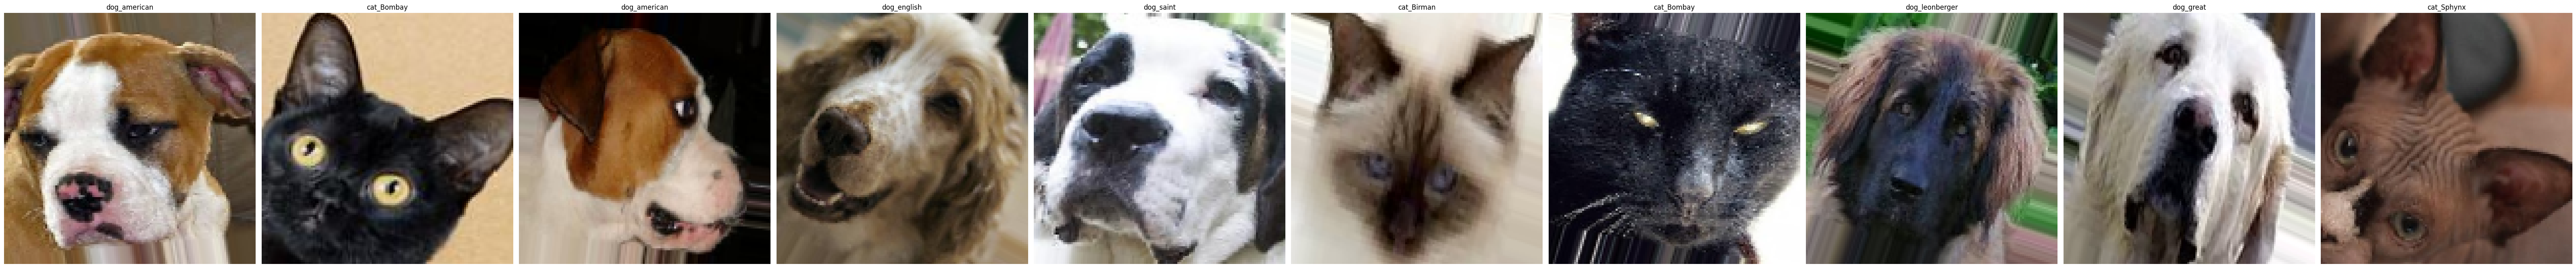

In [34]:
display_images(train_flow[0][0], [lablesNames[i] for i in np.argmax(train_flow[0][1], axis = 1)])


## Создание и компиляция модели

In [35]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.layers import *
model = keras.models.Sequential()
model.add(Conv2D(32, (15, 15), input_shape=(128, 128, 3), activation='tanh'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (5, 5), activation='tanh'))
model.add(MaxPooling2D())
model.add(Dense(128,  activation="relu"))
model.add(Dense(128,  activation="tanh"))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(1024,  activation="tanh"))
model.add(Dense(1024,  activation="tanh"))
model.add(Dense(512,  activation="tanh"))
model.add(Dense(35, activation='softmax'))

model.compile(tf.keras.optimizers.Adam(0.0001), 'categorical_crossentropy', ['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(3)])

model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 114, 114, 32)      21632     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 57, 57, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 53, 53, 64)        51264     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 26, 26, 64)        0         
 ng2D)                                                           
                                                                 
 dense_18 (Dense)            (None, 26, 26, 128)       8320      
                                                                 
 dense_19 (Dense)            (None, 26, 26, 128)      

## Обучение модели нейронной сети на тренировочных данных и оценка на валидационных данных в течение 20 эпох

In [36]:
hist = model.fit(train_flow,
  epochs = 20,
  validation_data = test_flow)

Epoch 1/20
259/259 [==============================] - 19s 60ms/step - loss: 3.1732 - accuracy: 0.1285 - top_k_categorical_accuracy: 0.2962 - val_loss: 2.5282 - val_accuracy: 0.2946 - val_top_k_categorical_accuracy: 0.5175
Epoch 2/20
259/259 [==============================] - 15s 59ms/step - loss: 2.3993 - accuracy: 0.3078 - top_k_categorical_accuracy: 0.5552 - val_loss: 2.0847 - val_accuracy: 0.3997 - val_top_k_categorical_accuracy: 0.6640
Epoch 3/20
259/259 [==============================] - 16s 61ms/step - loss: 2.1008 - accuracy: 0.3759 - top_k_categorical_accuracy: 0.6581 - val_loss: 1.9466 - val_accuracy: 0.4283 - val_top_k_categorical_accuracy: 0.6768
Epoch 4/20
259/259 [==============================] - 15s 59ms/step - loss: 1.8588 - accuracy: 0.4615 - top_k_categorical_accuracy: 0.7069 - val_loss: 1.8333 - val_accuracy: 0.4920 - val_top_k_categorical_accuracy: 0.7118
Epoch 5/20
259/259 [==============================] - 18s 68ms/step - loss: 1.7000 - accuracy: 0.5033 - top_k_ca

## Отображение кривых обучения:

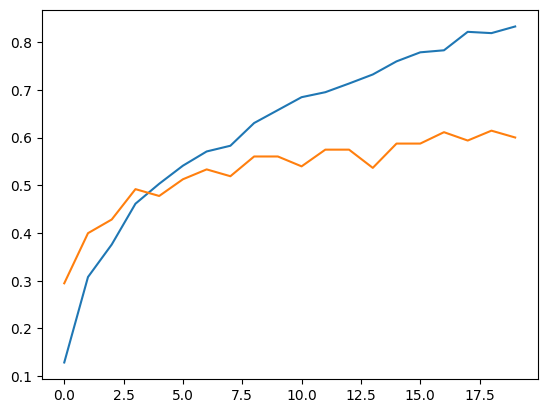

In [37]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

## Вычисление точности модели на тестовых данных

In [38]:


n_batches = len(test_flow)

test_labels = np.concatenate([np.argmax(test_flow[i][1], axis = 1) for i in range(n_batches)])
predictions = np.argmax(model.predict(test_flow, steps = n_batches), axis=1)


m = tf.keras.metrics.Accuracy()
m.update_state(test_labels, predictions)
m.result().numpy()



63/63 [==============================] - 2s 28ms/step


0.6003185

## Вычисление бинарной точности модели на тестовых данных:

In [39]:


binary_test_labels = test_labels.copy()
binary_test_labels[binary_test_labels < 12] = 0
binary_test_labels[binary_test_labels >= 12] = 1

binary_predictions = predictions.copy()
binary_predictions[binary_predictions < 12] = 0
binary_predictions[binary_predictions >= 12] = 1


m = tf.keras.metrics.Accuracy()
m.update_state(binary_test_labels, binary_predictions)
m.result().numpy()



0.9299363

## Confusion matrix

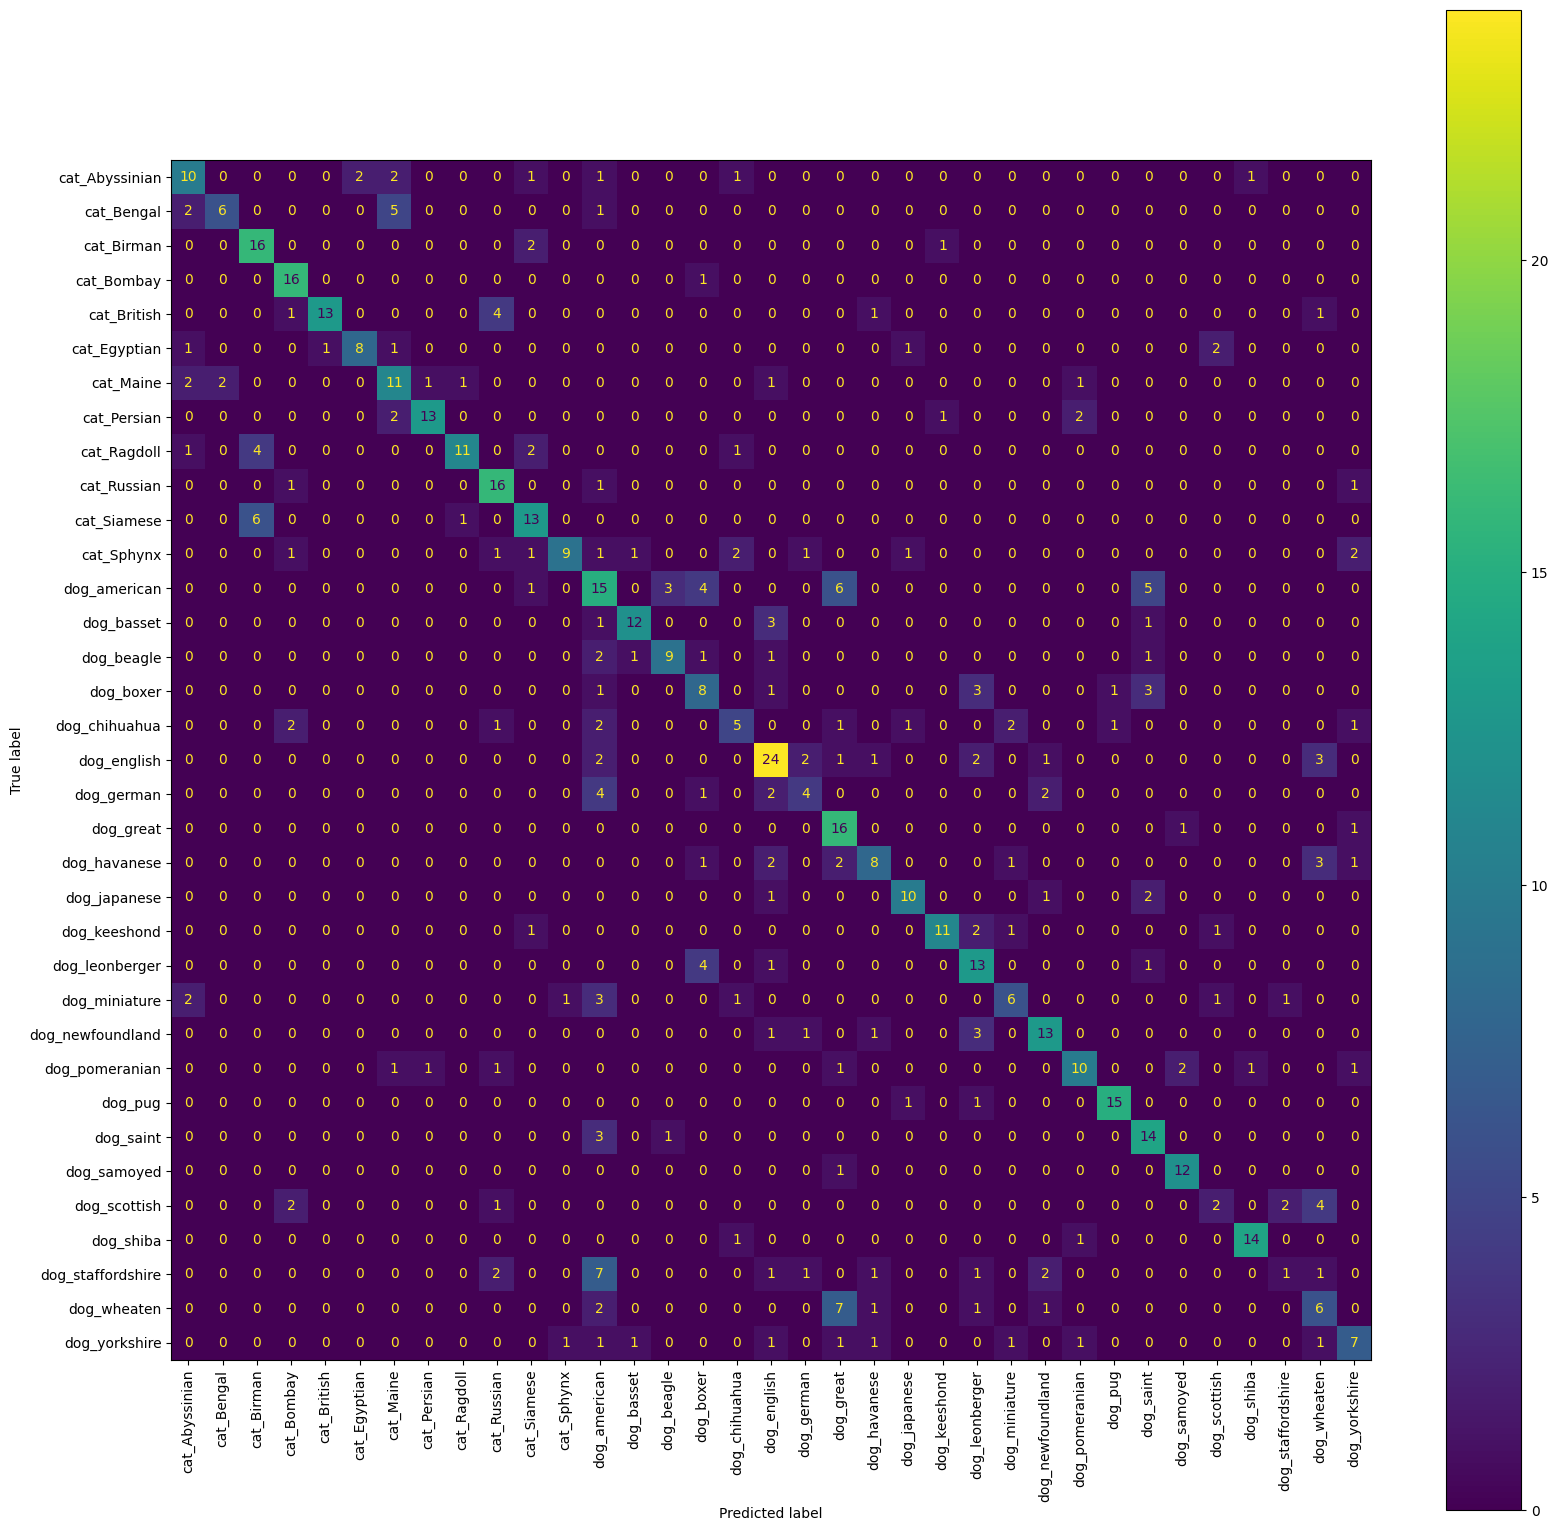

In [40]:
cm = confusion_matrix(test_labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                               display_labels = lablesNames)

fig = plt.figure(figsize = (10, 10))
ax = fig.add_axes([0, 0, 1.5, 1.5])

disp.plot(ax = ax, xticks_rotation='vertical')
plt.show()

## Top-3 accuracy

In [41]:
predicted_proba_distribution = model.predict(test_flow, steps = n_batches)
one_hot_test_labels = np.concatenate([test_flow[i][1] for i in range(n_batches)])


m = tf.keras.metrics.TopKCategoricalAccuracy(k = 3)
m.update_state(one_hot_test_labels,
               predicted_proba_distribution)
m.result().numpy()



63/63 [==============================] - 1s 11ms/step


0.816879